<a href="https://colab.research.google.com/github/BhagyaRekhaSunkavalli/AI-ML/blob/main/AI_ML_Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [10]:
housing_data = pd.read_csv('/content/Housing.csv')

categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
housing_data[categorical_cols] = housing_data[categorical_cols].replace({'yes': 1, 'no': 0})

housing_data = pd.get_dummies(housing_data, columns=['furnishingstatus'], drop_first=True)

X = housing_data.drop(columns=['price'])
y = housing_data['price']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<ipython-input-10-39f387167b22>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  housing_data[categorical_cols] = housing_data[categorical_cols].replace({'yes': 1, 'no': 0})


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [12]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred = linear_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 970043.4039201641
Mean Squared Error (MSE): 1754318687330.6685
R-squared (R²): 0.6529242642153175


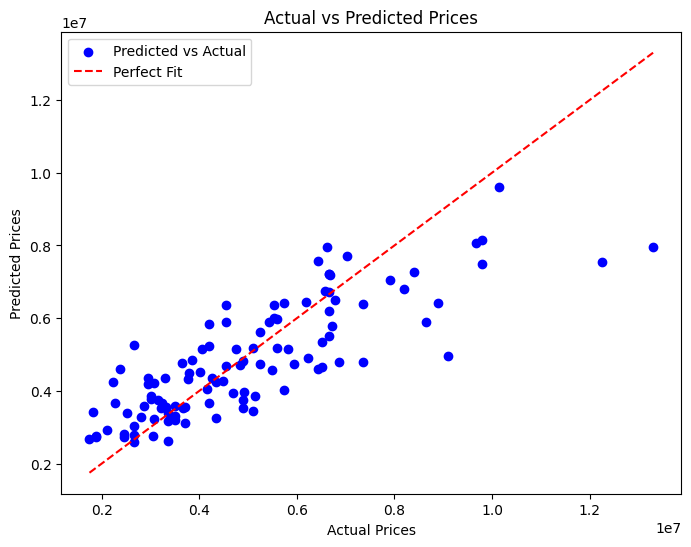

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed', label='Perfect Fit')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()

In [16]:
coefficients = pd.DataFrame({'Feature': housing_data.drop(columns=['price']).columns, 'Coefficient': linear_model.coef_})
print(coefficients)

                            Feature    Coefficient
0                              area  511615.563777
1                          bedrooms   56615.572458
2                         bathrooms  549420.501241
3                           stories  353158.429856
4                          mainroad  128151.921295
5                         guestroom   88590.213462
6                          basement  186194.150506
7                   hotwaterheating  143233.206250
8                   airconditioning  367817.894916
9                           parking  193542.781675
10                         prefarea  267018.660812
11  furnishingstatus_semi-furnished  -62550.297211
12     furnishingstatus_unfurnished -193987.781088
